# 線形回帰 

次のデータを得たとする：

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

import sklearn.linear_model as skl_lm
from mpl_toolkits.mplot3d import axes3d
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
advertising = pd.read_csv('Datasets/Advertising.csv', usecols=[1,2,3,4])
advertising.head(3)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3


In [3]:
credit = pd.read_csv('Datasets/Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


In [4]:
# 欠損値があるので処理
auto = pd.read_csv('Datasets/Auto.csv', na_values='?').dropna()
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite


Advertisingデータを元にして来年のセールスを増加させるマーケティングプランを提案することになったとする。この提案を行う上で、以下の問いについて考えることが重要である。

1. 広告にかける費用とセールスの間には関係があるのか
2. 広告費用とセールスの関係はどの程度の強さか
3. どの広告メディアがセールスに貢献するのか
4. それぞれのメディアがセールスに貢献する度合いをどの程度正確に予測することができるのか 
5. 将来のセールスをどの程度正確に予測できるのか
6. 線形の関係であるか
7. 各メディア間でのシナジー効果（交互作用）は存在するか

## 3.1 線形単回帰

### 図 3.1

``Advertising``データを可視化する：

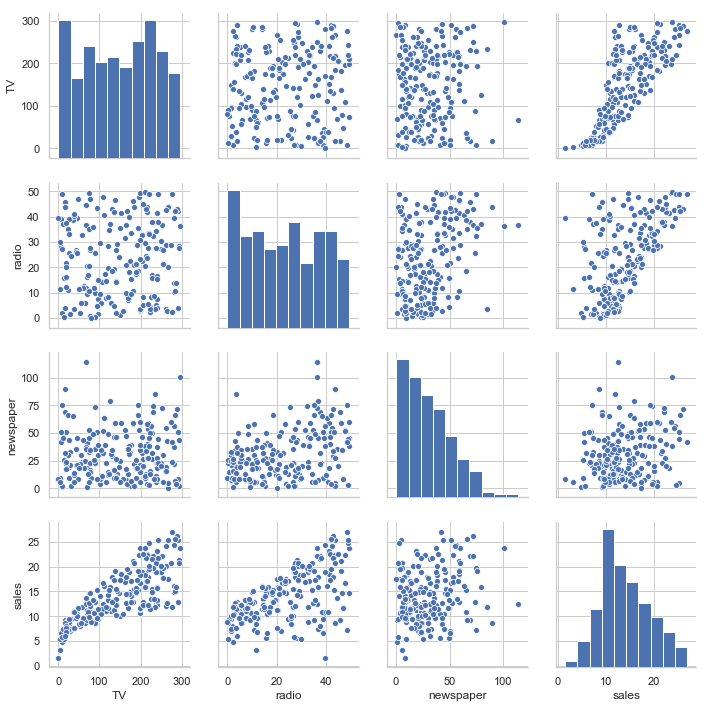

In [5]:
# グラフのスタイルを指定
sns.set(style='whitegrid', context='notebook')

cols = ['TV', 'radio', 'newspaper', 'sales']
# 変数のペアの関係をプロット, heightは一面のインチサイズ
sns.pairplot(advertising[cols], height=2.5)
plt.show()

``Advertising``データにおいて``sales``を``TV``に線形回帰したものを示す：

(0, 28.281704763383004)

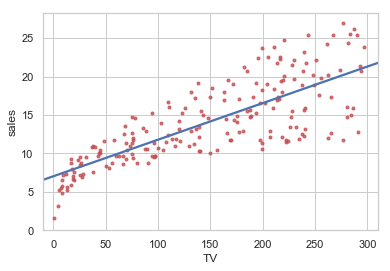

In [6]:
sns.regplot(advertising.TV, advertising.sales, order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0)

### 表3.1, 表3.2

``Advertising``データを使い、``sales``を``TV``に線形回帰した際の係数を示す。係数$\hat{\beta_1}$は標準誤差と比べてとても大きいことに注意されたい。したがって$t$統計量の値も大きい。帰無仮説「XとYの間には関係がない」が正しいとするとこのような値が起きる確率はほぼ0であり、ゆえに$\beta_1 \neq 0$であると結論づけることができる。

In [7]:
# 標準化（テキストに合わせ、以降は行わない）
advertising_std = (advertising - advertising.mean()) / advertising.std()

# 回帰
est_std = smf.ols('sales ~ TV', advertising_std).fit()
est_std.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 01 May 2019   Prob (F-statistic):           1.47e-42
Time:                        09:44:15   Log-Likelihood:                -188.64
No. Observations:                 200   AIC:                             381.3
Df Residuals:                     198   BIC:                             387.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.927e-16      0.044  -1.12e-14      1.000      -0.087       0.087
TV             0.7822      0.044     17.668      0.000       0.695       0.870
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
# RSS 
est = smf.ols('sales ~ TV', advertising).fit()
((advertising.sales - (est.params[0] + est.params[1]*advertising.TV))**2).sum()

2102.5305831313512

In [9]:
# RSS with advertising_std
((advertising_std.sales - (est_std.params[0] + est_std.params[1]*advertising_std.TV))**2).sum()

77.2368648808359

In [10]:
# sklearnでもやってみる

# 標準化も行う
sc = StandardScaler()
X = advertising[['TV']].values
y = advertising['sales'].values
X_std = sc.fit_transform(X)
y_std = (y - y.mean()) / y.std() 

# 回帰
slr = LinearRegression(normalize=False)
slr.fit(X_std, y_std)
print('Intercept:{0}'.format(slr.intercept_))
print('Slope:{0}'.format(slr.coef_[0]))

Intercept:-2.642826921026317e-16
Slope:0.7822244248616068


In [11]:
np.mean(X_std)

1.2212453270876723e-16

In [12]:
np.var(X_std)

1.0

In [13]:
# 標準化せずに推定
regr = LinearRegression()

X = advertising.TV.values.reshape(-1,1)
y = advertising.sales

regr.fit(X,y)
print(regr.intercept_)
print(regr.coef_)

7.032593549127693
[0.04753664]


標準誤差は信頼区間を求めるのに使われる。95%信頼区間とは95%の確率で未知パラメータの値が存在する範囲である。線形回帰においては$\beta$の95%信頼区間は$\hat{\beta}\pm 1.96 \cdot \mathrm{SE}(\beta)$である。つまり、およそ95%の確率で$\beta_1$の真の値が区間$[\hat{\beta} - 1.96 \mathrm{SE}(\beta_1), \hat{\beta} + 1.96 \mathrm{SE}(\beta_1)]$に存在する。ここで、$\mathrm{SE}({\hat{\beta}}) = \sqrt{\frac{\sum_i e_i^2}{(n - p - 1)*\sum (X_i - \bar(X))^2}}$である。

線形単回帰モデルを拡張し他の予測変数も考慮したい。各予測変数（各広告メディア）を予測変数として単回帰分析を別々に行うことも考えられる（結果は表3）が、十分な結果は得られない。なぜならば、各予測変数に別の回帰直線が存在するため、どのようにセールスを予測すれば良いのかが分からない。さらに、1つの予測変数で回帰係数を予測する場合には、残りの2つの変数を全く考慮していない。そこで複数の予測変数を同時に扱うことを考える。

### 表3.3

In [14]:
est = smf.ols('sales ~ radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,9.3116,0.563,16.542,0.000,8.202,10.422
radio,0.2025,0.020,9.921,0.000,0.162,0.243


In [15]:
est = smf.ols('sales ~ newspaper', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,12.3514,0.621,19.876,0.000,11.126,13.577
newspaper,0.0547,0.017,3.300,0.001,0.022,0.087


## 3.2 線形重回帰

線形重回帰モデルは次で与えられる：

\begin{align} 
    Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \cdots + \beta_p X_p + \epsilon \tag{3.19}
\end{align}

ここで、$X_j$は$j$番目の予測変数であり、$\beta_j$はその予測変数と応答変数$Y$の関係を表す量である。$\beta_j$は、他の全ての予測変数は固定させたまま$X_j$のみ1単位分増加した時の$Y$の平均的増加である。``Advertising``データセットにおいては、(3.19)は次のようになる：

\begin{equation}
    \mathrm{sales} = \beta_0 + \beta_1 \times \mathrm{TV} + \beta_2 \times \mathrm{radio} + \beta_3 \times \mathrm{newspaper} + \epsilon \tag{3.20}
\end{equation}

線形単回帰の時と同様、最小2乗法により係数を推定する。

### 表3.4

In [16]:
est_full = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est_full.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.9389,0.312,9.422,0.000,2.324,3.554
TV,0.0458,0.001,32.809,0.000,0.043,0.049
radio,0.1885,0.009,21.893,0.000,0.172,0.206
newspaper,-0.0010,0.006,-0.177,0.860,-0.013,0.011


この結果は次のように解釈することができる：

- テレビと新聞の広告費を固定したもとで、ラジオの広告費を1000ドル増やすと、セールスはおよそ189個増加する。
- 線形単回帰の結果と比較すると、テレビとラジオに関しては重回帰と単回帰の係数の推定値はかなり近いといえる。新聞広告費に関しては、表3.3において明らかに0でないが、重回帰ではほぼ0であり、p値も約0.86であり、有意ではない。

重回帰では``sales``と``newspaper``に関係がないとなり、単回帰をすると両者には関係があるという結果が出るということは起こりうる。各変数の相関行列について考える。``radio``と``newspaper``の相関係数は0.35である。つまり、ラジオ広告費が大きいマーケットでは新聞広告費も大きいことを示す。ここで、重回帰モデルが正しい（新聞広告費はセールスに影響しないがラジオ広告費は影響する）と仮定すると、ラジオ広告費を多く費やすマーケットではセールスは増大するし、そのマーケットでは新聞広告費も増大しがちである。単回帰においては、実は新聞広告費はセールスに影響せず、実は``radio``が``sales``に影響を与えているのに、``newspaper``が「手柄を横取り」しているのである。

### 表3.5

In [17]:
advertising.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


重回帰を行う際には、通常、次のような問題に対する答えに関心が持たれる：

1. 予測変数$X_1, X_2, \ldots, X_p$のうち、少なくとも1つは応答変数を予測する上で有効であるか
2. 予測変数のすべてが$Y$を説明するのに役立っているのか、それとも一部の予測変数だけが説明しているのか
3. モデルはデータにどの程度よく当てはまっているか
4. ある予測変数の値において、応答変数の予測値はどのような値となっているか、そしてその予測はどの程度正確なのか

### 1: 応答変数と予測変数の間に関係があるのか

線形単回帰の場合は、応答変数と予測変数の間に関係があるかを決めるには、単純に$\beta_1 = 0$かどうかを調べれば良かった。重回帰の場合は、すべての回帰係数が0であるか否か、つまり以下の帰無仮説と対立仮説を検定する：

\begin{align}
    H_0 &: \beta_1 = \beta_2 = \cdots = \beta_p = 0 \\
    H_1 &: \beta_j\mathrm{のうち少なくとも1つは非ゼロである}
\end{align}

この仮説検定では$F$統計量を計算する：

\begin{equation}
    F = \frac{(\mathrm{TSS} - \mathrm{RSS}) / p}{\mathrm{RSS} / (n - p - 1)}
\end{equation}

単回帰のときと同様、$\mathrm{TSS} = \sum(y_i - \bar{y})^2$、$\mathrm{RSS} = \sum(y_i - \hat{y}_i)^2$である。
重回帰モデルの仮定が正しいならば、$E[\mathrm{RSS}/(n-p-1)] = \sigma^2$であり、$H_0$が真ならば$E[(\mathrm{TSS} - \mathrm{RSS}) / p] = \sigma^2$となる。ゆえに、応答変数と予測変数の間に何も関係がないとすると、$F$統計量は1に近い値となる。反対にもし$H_1$が真である場合、$E[(\mathrm{TSS} - \mathrm{RSS}) / p] > \sigma^2$となり、$F$は1よりも大きくなる。

### 表3.6

In [18]:
est_full = smf.ols('sales ~ TV + radio + newspaper', advertising).fit()
est_full.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,570.3
Date:,"Wed, 01 May 2019",Prob (F-statistic):,1.58e-96
Time:,09:44:16,Log-Likelihood:,-386.18
No. Observations:,200,AIC:,780.4
Df Residuals:,196,BIC:,793.6
Df Model:,3,,
Covariance Type:,nonrobust,,


先の広告の例では、表からわかるように$F$統計量は570であり、帰無仮説を棄却するのに十分な根拠となる。帰無仮説を棄却し、予測変数と応答変数に関係があると結論付けるのに十分な$F$統計量は、$n$と$p$に依存する。$n$が大きい場合には$F$統計量は1より少し大きいだけで$H_0$を棄却する根拠となりうるが、$n$が小さい場合には$H_0$を棄却するのにより大きな$F$統計量が必要である。

すべての予測変数ではなく、ある特定の$q$個の係数のみについて検定したい場合がある。この場合の適切な$F$統計量は次である（ただし$\mathrm{RSS}_0$は$q$個の変数を除く全てを使って当てはめたモデル）：

\begin{equation}
    F = \frac{(\mathrm{RSS}_0 - \mathrm{RSS}) / q}{\mathrm{RSS} / (n - p -1)}
\end{equation}

表3.4に各予測変数について、$t$統計量および$p$値は示されている。これらの数値は他の予測変数を考慮した上で、各予測変数が応答変数に関係しているかどうかについての情報を与えてくれる。これらは実のところモデルからその予測変数1つだけを外し、残りはすべてモデルに残したままにしたときの$F$検定と同じである。したがってこれらの数値はモデルにその予測変数を加えたときの部分的効果を表す。

各予測変数についての$p$値があるにもかかわらず、全体の$F$統計量を検討する必要があるのは、特に$p$が大きいときに問題が起きるからである。前変数の個数のうち約5パーセントの割合の予測変数の$p$値については、予測変数と応答変数の間に何の関係が無くとも確率的に0.05以下となってしまう。例えば$p=100$のときは（何の関係が無くとも）$5$個程度の小さい$p$値を見ることになり、誤った結論を導いてしまう。しかし、$F$統計量を使えばこの誤りを回避できる。$F$統計量は予測変数の数を考慮するからである。ちなみに、$F$統計量を使い予測変数と応答変数の間に関係があるかどうかを判断するアプローチは$p$が比較的小さいとき＋$p$が$n$と比較して小さいときには機能する。しかし$p > n$のときは機能せず、最小2乗法すら当てはめることができなくなる。このような場合には変数増加法などを使うこととなる。

### 2: 重要な変数をどのように選ぶか

F統計量を計算し対応する$p$値を検討することが回帰分析で最初に行うべきことであるが、$p$値を吟味し、少なくとも1つの予測変数が応答変数に関係しているとなった場合、次に調べるのはどの予測変数が実際に関係しているかということである。表の個別の$p$値を見ても良いが、$p$が大きい場合には誤った判断を下してしまう。

理想的には予測変数の異なる部分集合を使い多くのモデルを検討することにより変数選択を行いたいところである。例えば$p=2$であれば次の4つのモデルを考え、一番良いモデルを選べばよい：(1)どの変数も含まないモデル(2)$X_1$のみを含むモデル(3)$X_2$のみを含むモデル(4)$X_1, X_2$両方を含むモデル。しかし$p$この変数の部分集合は$2^p$個あり、例えば$p=30$でも$2^30 = 1073741824$個ものモデルを比較しなければならない。したがって現実的には不可能なため、少数のモデルのみを考えることで済むようなアプローチが必要となる。古典的なアプローチが3つある：

1. 変数増加法：
切片のみのヌルモデルから始め、各予測変数を加えp個の単回帰モデルをつくり、まずRSSが最小になる変数を加える。次にこのモデルにRSSが最小になるような変数を加え、2変数のモデルを得る。これをある条件が満たされるまで繰り返す。
2. 変数減少法：
全ての変数を含むモデルから始める。p値が最も大きい変数を取り除く。これを繰り返していくが、停止条件は例えばすべての変数のp値が何らかの閾値よりも小さくなるまでなどの条件である。
3. 変数増減法：
変数増加法と変数減少法を組み合わせた方法である。これは変数増加法と同様にヌルモデルから始めていくが、Advertisingデータの例で見たように、新しい予測変数がモデルに加えられることによりp値が増加することがある。その場合はその変数をモデルから取り除く。このように増減を繰り返していく。

もし$p > n$であれば変数減少法は使えないが、変数増加法は常に使うことができる。変数増加法は貪欲的なアプローチのため、後に不要になる変数を最初に取り込んでしまう可能性がある問題があるが、変数増減法はこれを緩和する。

### 3: モデルの当てはめ 

モデルの当てはめの度合いを数値で測るのに最もよく使われる規準は$\mathrm{RSE}$と$R^2$である。単回帰においては$R^2$は応答変数と予測変数の相関係数の2乗であり、重回帰においては$Cor(Y, \hat{Y})^2$、つまり、応答変数と予測値の相関係数の2乗となる。

$R^2$が1に近いということは、モデルが応答変数の分散のうち多くの部分を説明しているということである。次の表はAdvertisingの例において``TV``と``radio``のみを予測変数としたモデルにおける結果であるが、表3.4（3つの予測変数を使ったときの結果）の$R^2$と比較すると、それぞれ0.89719, 0.8972である。

In [19]:
est = smf.ols('sales ~ TV + radio', advertising).fit()
est.summary().tables[0]

Dep. Variable:,sales,R-squared:,0.897
Model:,OLS,Adj. R-squared:,0.896
Method:,Least Squares,F-statistic:,859.6
Date:,"Wed, 01 May 2019",Prob (F-statistic):,4.83e-98
Time:,09:44:16,Log-Likelihood:,-386.20
No. Observations:,200,AIC:,778.4
Df Residuals:,197,BIC:,788.3
Df Model:,2,,
Covariance Type:,nonrobust,,


表3.4では新聞広告費の$p$値は有意ではないが、それでもテレビとラジオだけを含むモデルに新聞を予測変数として加えると、$R^2$はわずかに増加している。その変数と応答変数の関係が非常に弱いものであったとしても、変数が増えるごとに$R^2$はとにかく増加するのである。これは最小2乗法の式に新たな変数を加えると、訓練データに当てはめる制度は必ず向上することによる。このとき、テストデータを予測する精度は上がっているとは限らない。$R^2$の値も訓練データを使って計算するので、これも必ず増加する。テレビとラジオだけを予測変数とするモデルに新聞を加えるとわずかだけ$R^2$が増加するという事実がモデルから``newspaper``を削除できることの根拠である。

$\mathrm{RSS}$の一般的な定義は以下であるが、``TV``と``radio``のみを予測変数とするモデルの$\mathrm{RSE}$は1.681である：

\begin{equation}
    \mathrm{RSE} = \sqrt{\frac{1}{n-p-1} \mathrm{RSS}}
\end{equation}

In [20]:
# calculate RSSs
RSS_TV_radio = ((advertising.sales - (est.params[0] + est.params[1]*advertising.TV + est.params[2]*advertising.radio))**2).sum()
RSS_full = ((advertising.sales - (est_full.params[0] + est_full.params[1]*advertising.TV + est_full.params[2]*advertising.radio + est_full.params[3]*advertising.newspaper))**2).sum()

print('RSS_TV_radio:', RSS_TV_radio)
print('RSS_full:', RSS_full)

# calculate RSEs
RSE_TV_radio = np.sqrt(RSS_TV_radio / (len(advertising.index) - 2 - 1))
RSE_full = np.sqrt(RSS_full / (len(advertising.index) - len(advertising.columns) - 1))
print('RSE_TV_radio:', RSE_TV_radio)
print('RSE_full:', RSE_full)

RSS_TV_radio: 556.9139800676184
RSS_full: 556.8252629021873
RSE_TV_radio: 1.681360912508001
RSE_full: 1.68982666825008


これに対し、フルモデルでは1.690となり、テレビとラジオがすでに予測変数であるならば新聞の広告費用を新たに入れることに意味はないということを意味している。RSSが減少するにもかかわらずRSEが増加しているが、（RSEの定義式を見てわかるように）pの増加と比べてRSSの減少量が比較的小さい場合は、RSEが大きくなることが起こりうる。

RSEや$R^2$だけでなく実際にデータをプロットしてみることが有効な場合もある。視覚で確認することで数値だけでは見えないモデルに関する問題が明らかになることもある。

In [21]:
regr = skl_lm.LinearRegression()
X = advertising[['radio', 'TV']]
y = advertising.sales

regr.fit(X,y)

# Create a coordinate grid
Radio = np.arange(0,50)
TV = np.arange(0,300)

# 多次元化
B1, B2 = np.meshgrid(Radio, TV, indexing='xy')
Z = np.zeros((TV.size, Radio.size))

for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(regr.intercept_ + B1[i,j]*regr.coef_[0] + B2[i,j]*regr.coef_[1])

Text(0.5, 0, 'sales')

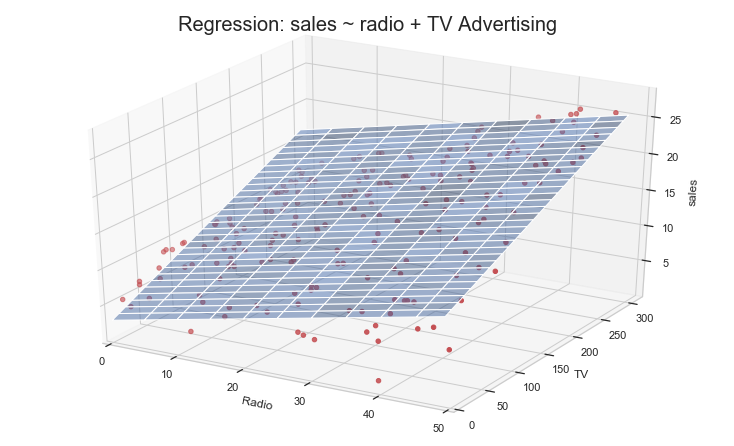

In [22]:
# Create plot
fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: sales ~ radio + TV Advertising', fontsize=20)

ax = axes3d.Axes3D(fig)

ax.scatter3D(advertising.radio, advertising.TV, advertising.sales, c='r')
# 格子点（X,Y）を作成し関数値Zを計算したら渡すだけの3D関数
ax.plot_surface(B1, B2, Z, rstride=10, cstride=5, alpha=0.5, color='b')

ax.set_xlabel('Radio')
ax.set_xlim(0,50)
ax.set_ylabel('TV')
ax.set_ylim(bottom=0)
ax.set_zlabel('sales')

図からは分かりにくいがデータには非線形の関係があることが分かる。観測データは最小二乗平面より上に位置するものもあれば下に位置するものもある。特にこの線形モデルは、広告費が``TV``のみまたは``radio``のみに使われた場合には``sales``を過小評価する傾向にある。このような強い非線形のパターンは線形回帰では正確にモデル化することはできない。異なる広告メディアを組み合わせることにより、どちらか片方のメディアを使うよりもセールスをより押し上げる相乗効果、または交互作用が働いていることを示唆している。

### 4: 予測

推定したモデルから予測できるようになるが、この予測には3つの不確かさがつきまとう。その1つは推定した係数の不確かさであるが、これは削減可能である。$\hat{Y}$がどの程度真の$f(X)$に近いかは信頼区間を使うことができる。$f(X) = \beta_0 + \beta_1 X_1 + \cdots + \beta_p X_p$が線形であるという仮定はほとんどの場合において近似であり、もう一つ別の削減可能な誤差があることになるがここでは考えない。もし真の$f(X)$が既知であるとしても、モデルの削減不能誤差がある。$Y$と$\hat{Y}$はどれだけ離れているかは予測区間によってこの問いに答えることができる。予測区間は$f(X)$を予測する際の誤差（削減可能誤差）と実際の値が母回帰直線からどれだけ離れているか（削減不能誤差）の両方を含むため信頼区間の幅より大きい。

## 3.3 回帰モデルにおける他の考察

- 予測変数が質的変数を含むときには、ダミー変数を作成すればよい。例えば``gender``であれば
\begin{equation}
    x_i = \begin{cases}
        1 & i番目の人が女性のとき \\
        0 & i番目の人が男性のとき
          \end{cases}
\end{equation}
となる新しい変数を定義すればよい。これを逆にした場合、係数の推定値も変わることに注意されたい（モデルの式に立ち戻って考える）。
予測変数が2値以外のカテゴリ変数のとき、カテゴリの数-1個のダミー変数を用意すればよい（これもモデルの式に立ち戻ればわかる）。

### 線形モデルの拡張

線形回帰モデルを使えば解釈できる結果を得られる。また、線形回帰モデルは多くの実際の問題においてよく機能する。しかし、線形回帰モデルは理論的に非常に限定的な前提条件の上に成り立っており、これらは実際には成り立っていないことがある。2つの重要な仮定は加法性と線形性である。加法性とは、予測変数$X_j$が応答変数$Y$に与える影響は他の予測変数とは独立しているという仮定である。線形性とは、$X_j$を1単位変化させたときの$Y$の変化量は$X_j$に関わらず一定であるということである。

#### 加法モデルの仮定を取り除く

これまでの``Advertising``のデータの分析では、``TV``と``radio``の両方が``sales``と関係していると結論付けた。この結論の根拠となった線形モデルの前提条件として、1つのメディアについての広告費を増加させたことが``sales``に与える影響は他のメディアの広告費と無関係であるということである。例えば線形モデル(3.20)によれば、変数``TV``を1単位増加させたときの``sales``の平均的増加量は$\beta_1$であり、これは``radio``の広告費によらない。
しかし、この単純なモデルは正しくない可能性がある。ラジオ広告に費用をかけることによりテレビ広告の効果が上がる。つまり``radio``の増加に伴い``TV``の係数も増加すると仮定する。この状況では広告費全額を``radio``あるいは``TV``だけに使うよりも半分ずつそれぞれに費やす方が``sales``の増加量が大きい。3Dプロットがそれを示唆しており、これをシナジーあるいは相乗効果（統計学では交互作用）と呼ぶ。``TV``または``radio``のいずれかの値が小さいときは、真の``sales``は線形モデルの予測よりも小さい。しかし広告費が2つのメディアに均等に使われたときは、逆にモデルが``sales``を過小に予測する傾向がある。

標準的な2変数の線形回帰モデルを考える：
\begin{equation}
    Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \epsilon
\end{equation}
このモデルでは$X_1$を1単位増加させたときに$Y$は$X_2$の値にかかわらず平均$\beta_1$単位増加する。このモデルを拡張し交互作用を扱う方法の1つは、交互作用項と呼ばれる新たな予測変数をモデルに加えることである：
\begin{align}
    Y & = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_1 X_2 + \epsilon \\
      & = \beta_0 + (\beta_1 + \beta_3 X_2) X_1 + \beta_2 X_2 + \epsilon \\
      & = \beta_0 + \tilde{\beta_1} X_1 + \beta_2 X_2 + \epsilon 
\end{align}
$\beta_3$の解釈の仕方としては、$X_2$を1単位増加（減少）させたときの$X_1$の効果が向上（低下）する量を表しているといえる。

このモデルを``Advertising``データに適用する。``radio``、``TV``、これらの交互作用項を使って``sales``を予測する。つまり、次の式を考えていることになる：
\begin{equation}
\mathrm{sales} = \beta_0 + (\beta_1 + \beta_3 \times \mathrm{radio}) \times \mathrm{TV} + \beta_2 \times \mathrm{radio} + \epsilon
\end{equation}
結果は次である：

### 表3.9

In [23]:
est = smf.ols('sales ~ TV + radio + TV*radio', advertising).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,6.7502,0.248,27.233,0.000,6.261,7.239
TV,0.0191,0.002,12.699,0.000,0.016,0.022
radio,0.0289,0.009,3.241,0.001,0.011,0.046
TV:radio,0.0011,5.24e-05,20.727,0.000,0.001,0.001


この結果は、交互作用を含むモデルの方が主効果のみのモデルよりも優れていることを強く示唆している。その根拠は、交互作用項のp値が極めて小さいことである。この係数の推定値を見ると、テレビ広告を1000ドル増加するとき、セールスは$(\hat{\beta}_1 + \hat{\beta}_3 \times \mathrm{radio}) \times 1000 = 19 + 1.1 \times \mathrm{radio}$個ほど増加する。また、ラジオ広告を1000ドル増加するとセールスは$(\hat{\beta}_2 + \hat{\beta}_3 \times \mathrm{TV}) \times 1000 = 29 + 1.1 \times \mathrm{TV}$個ほど増加する。

この例では、各変数、交互作用項のp値は全て統計的に有意であり（表3.9）、したがって3つの変数をすべてモデルに含めるべきである。しかし、時には交互作用項のp値はとても小さいが主効果（この場合は``TV``と``radio``）のp値が小さくないということがある。階層の原則によれば、交互作用項をモデルに含めるならば、主効果の係数についてのp値が統計的に有意でなかったとしても、その主効果もモデルに含めるべきである。この原則の根拠は、$X_1, X_2$の交互作用が応答変数に関係しているならば$X_1$や$X_2$の係数はあまり重要ではないということである。また、$X_1$や$X_2$は多くの場合それらの交互作用$X_1 X_2$に関係しているから、これらをモデルから外すことは交互作用の意味を変えてしまうことになりかねない。

交互作用項を含むことで、まずいモデリングの問題を回避することもできる。
``Credit``データセットの``Balance``を量的変数``Income``と質的変数``student``を使って予測することを考える。

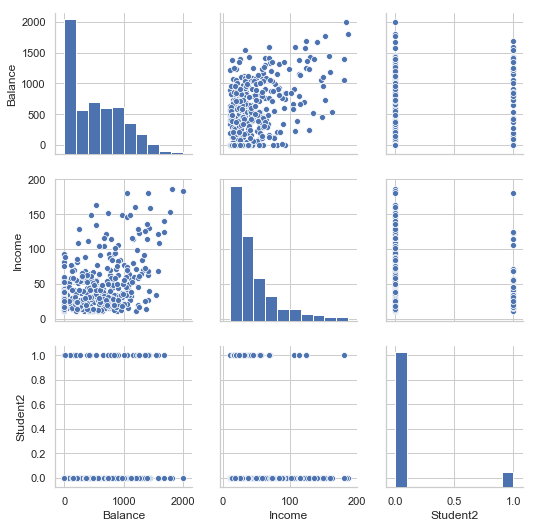

In [24]:
sns.pairplot(credit[['Balance','Income','Student2']]);

交互作用項を含まない場合、モデルの式は次のようになる：
\begin{align}
\mathrm{Balance}_i & \approx \beta_0 + \beta_1 \times \mathrm{Income}_i + \begin{cases}
\beta_2 & i番目の人が学生である場合 \\
0 & i番目の人が学生でない場合
\end{cases} \\
& = \beta_1 \times \mathrm{Income}_i + \begin{cases}
\beta_0 + \beta_2 & i番目の人が学生である場合 \\
\beta_0 & i番目の人が学生でない場合
\end{cases}
\end{align}

これは結局、2本の平行な直線を当てはめていることに他ならない。片方は学生の直線でもう片方は学生でない人の直線である。2本の直線は切片は$\beta_0 + \beta_2$と$\beta_0$で異なるが、傾きはともに$\beta_1$である。これはつまり、``Income``を1単位増加させることが``Balance``に与える平均的効果はその人が学生であるか否かに関係がないということを意味する。これは、``Income``に変化が起きたときのクレジットカード債務残高の影響は学生か否かによってかなり異なるかもしれないという（通常の）直観に反するため、問題である。

In [25]:
est1 = smf.ols('Balance ~ Income + Student2', credit).fit()
regr1 = est1.params
est2 = smf.ols('Balance ~ Income + Income*Student2', credit).fit()
regr2 = est2.params

print('Regression 1 - without interaction term')
print(regr1)
print('\nRegression 2 - with interaction term')
print(regr2)

Regression 1 - without interaction term
Intercept    211.142964
Income         5.984336
Student2     382.670539
dtype: float64

Regression 2 - with interaction term
Intercept          200.623153
Income               6.218169
Student2           476.675843
Income:Student2     -1.999151
dtype: float64


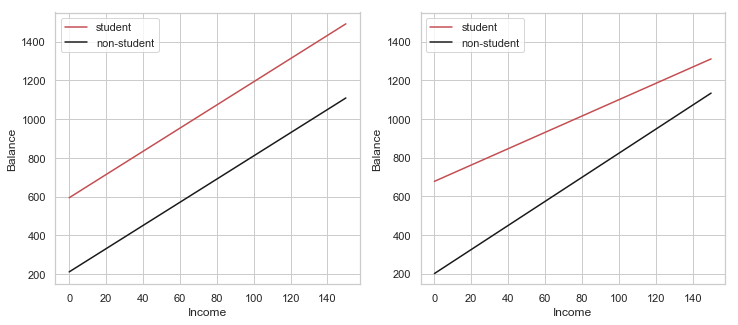

In [26]:
# Income （X軸）
income = np.linspace(0,150)

# Balance without 交互作用項 (Y軸)
student1 = np.linspace(regr1['Intercept']+regr1['Student2'],
                       regr1['Intercept']+regr1['Student2']+150*regr1['Income'])
non_student1 =  np.linspace(regr1['Intercept'], regr1['Intercept']+150*regr1['Income'])

# Balance with 交互作用項 (Y軸)
student2 = np.linspace(regr2['Intercept']+regr2['Student2'],
                       regr2['Intercept']+regr2['Student2']+
                       150*(regr2['Income']+regr2['Income:Student2']))
non_student2 =  np.linspace(regr2['Intercept'], regr2['Intercept']+150*regr2['Income'])

# Create plot
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(income, student1, 'r', income, non_student1, 'k')
ax2.plot(income, student2, 'r', income, non_student2, 'k')

for ax in fig.axes:
    ax.legend(['student', 'non-student'], loc=2)
    ax.set_xlabel('Income')
    ax.set_ylabel('Balance')
    ax.set_ylim(top=1550)

この問題には交互作用項で対処できる。``Income``と``Student``のダミー変数を掛け合わせて交互作用項を作るのである：
\begin{align}
\mathrm{Balance}_i & \approx \beta_0 + \beta_1 \times \mathrm{Income}_i + 
    \begin{cases}
        \beta_2 + \beta_3 \times \mathrm{Income}_i & 学生の場合 \\
        0 & 学生でない場合 
    \end{cases} \\
    & = \begin{cases}
            (\beta_0 + \beta_2) + (\beta_1 + \beta_3) \times \mathrm{Income}_i & 学生の場合 \\
            \beta_0 + \beta_1 \times \mathrm{Income}_i & 学生でない場合
        \end{cases}
\end{align}
今回は2本の回帰直線が異なる切片（$\beta_0 + \beta_2$と$\beta_0$）と異なる傾き（$\beta_1+\beta_3$と$\beta_1$）をもつ。これにより、収入の変化がもたらすクレジットカード債務残高の変化が、学生と学生でない人には異なる効果があることをモデル化することができた。図の右の傾きが異なる2本の直線のうち、学生の回帰直線の傾きは学生でない人よりも小さいことが分かるが、これは学生の場合、収入が増えたときのクレジットカードの債務残高の増加は学生でない人よりも小さいことを示唆する。

#### 非線形の関係

- モデル(3.19)では真の関係が線形であると仮定しているが、非線形の場合もある。線形モデルで非線形の関係を扱う単純な方法は、モデルに含む予測変数になんらかの変換を施して使うことである（例えば$X^2$）。それでもなお線形モデル（$X^2=:X$とみなせば線形モデルと同じ）であることに注意されたい。これにより標準的な線形回帰のソフトウェアを使って係数を推定することができる。

### 起こりうる問題

線形回帰モデルをデータセットに当てはめるときに様々な問題が起こりうる。最もよく起きる問題は次のとおりである：

1. 予測変数と応答変数の関係が非線形である（→（予測値に対する）残差プロットに傾向が無いか）
2. 誤差項に相関がある（→誤差項のプロットが、隣接する点同士が似たような値になってないか）
3. 誤差項の分散が均一でない（→残差プロットが漏斗の形をしていないか）
4. 外れ値（→（スチューデント化）残差プロットの値が大きくないか）
5. てこ比が大きい観測データ（→てこ比に対するスチューデント化残差のプロットで、てこ比が大きくないか）
6. 共線性（→相関行列、VIF大きくないか）

参考文献3によれば、残差の正規性は残差の正規Q-Qプロットで判定する。

#### 1. 予測変数と応答変数の関係が非線形である

線形回帰モデルは予測変数と応答変数の間に線形の関係があることを仮定しており、もし真の関係が線形からほど遠いとすると、回帰から得られるすべての結論は疑わしいことになる。またモデルの予測精度もかなり落ちることになる。

残差プロットは非線形性を確認するための便利なツールである。線形単回帰では残差$e_i = y_i - \hat{y}_i$と予測変数$x_i$を、重回帰モデルでは（複数の予測変数があるため）$e_i$と$\hat{y}_i$をプロットする。残差プロットは何のパターンもないことが理想的であるが、何らかのパターンが存在する場合には線形モデルに問題があることを示している可能性がある。

図3.9の左のグラフは``Auto``データで``mpg``を``horsepower``に回帰したときの残差プロットである。赤線は残差になめらかに当てはめたものであり、トレンドがあることが分かりやすい。それに対し右のグラフは、2次の項を含む式のモデルの残差プロットである。残差にパターンはほとんどないように見え、つまり、2次の項がデータの当てはめを向上させたといえる。

残差プロットがデータにおける非線形性を示唆している場合の簡単な対処法は、予測変数に$logX, \sqrt{X}, X^2$などの非線形変換を施すことである。

### 図3.9 

In [27]:
auto['horsepower2'] = auto.horsepower**2
auto.head(3)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,16900.0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,27225.0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,22500.0


In [28]:
regr = skl_lm.LinearRegression()

# Linear fit
X = auto.horsepower.values.reshape(-1,1)
y = auto.mpg
regr.fit(X, y)

auto['pred1'] = regr.predict(X)
auto['resid1'] = auto.mpg - auto.pred1

# Quadratic fit
X2 = auto[['horsepower', 'horsepower2']].values
regr.fit(X2, y)

auto['pred2'] = regr.predict(X2)
auto['resid2'] = auto.mpg - auto.pred2

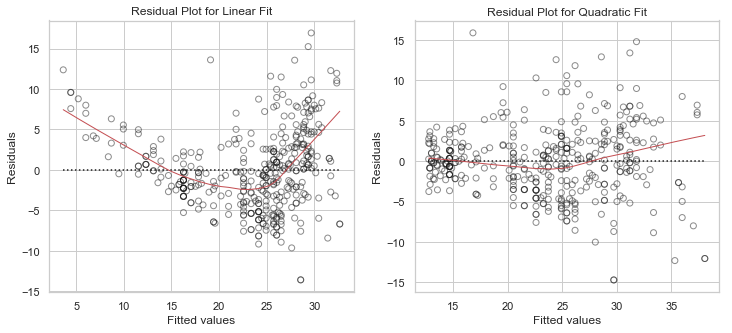

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
sns.regplot(auto.pred1, auto.resid1, lowess=True, 
            ax=ax1, line_kws={'color':'r', 'lw':1},
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax1.hlines(0,xmin=ax1.xaxis.get_data_interval()[0],
           xmax=ax1.xaxis.get_data_interval()[1], linestyles='dotted')
ax1.set_title('Residual Plot for Linear Fit')

# Right plot
sns.regplot(auto.pred2, auto.resid2, lowess=True,
            line_kws={'color':'r', 'lw':1}, ax=ax2,
            scatter_kws={'facecolors':'None', 'edgecolors':'k', 'alpha':0.5})
ax2.hlines(0,xmin=ax2.xaxis.get_data_interval()[0],
           xmax=ax2.xaxis.get_data_interval()[1], linestyles='dotted')
ax2.set_title('Residual Plot for Quadratic Fit')

for ax in fig.axes:
    ax.set_xlabel('Fitted values')
    ax.set_ylabel('Residuals')

### 2. 誤差の相関

線形回帰の重要な仮定の一つに、誤差$\epsilon_1, \epsilon_2, \ldots, \epsilon_n$に相関関係がないというものがある。これは、例えば誤差に相関関係がないならば、$\epsilon_i$が正だったとしてそれが$\epsilon_{i+1}$の富豪についての情報をほとんど、あるいはまったくもたないということである。回帰係数の推定値、応答変数の予測値の標準誤差のいずれも相関関係のない誤差項を仮定している。もし誤差に相関関係があれば、推定された標準誤差は真の標準誤差よりも小さくなる傾向にある。結果として、信頼区間と予測区間は本来あるべきものよりも狭くなる。例えば、名目上95%の信頼区間が真のパラメータを含む確率が実は95%よりもかなり小さいということになるかもしれない。

誤差の間に相関関係が起こりうる状況は時系列データを扱う場合に良く起きる。多くの場合、時間軸上の隣接する点における測定値には正の相関関係がある。あるデータセットで個の相関関係があるかどうかを調べるには、残差を時間の関数としてプロットすると良い。誤差に相関が無いならば、目立つような規則性はないはずである。もし誤差に性の相関関係があれば、隣接する点同士の残差が似たような値になるトラッキングの傾向をみせるはずである。下の例では時系列データではないデータの残差をインデックスごとに見た例であるが、残差に相関は見られない。

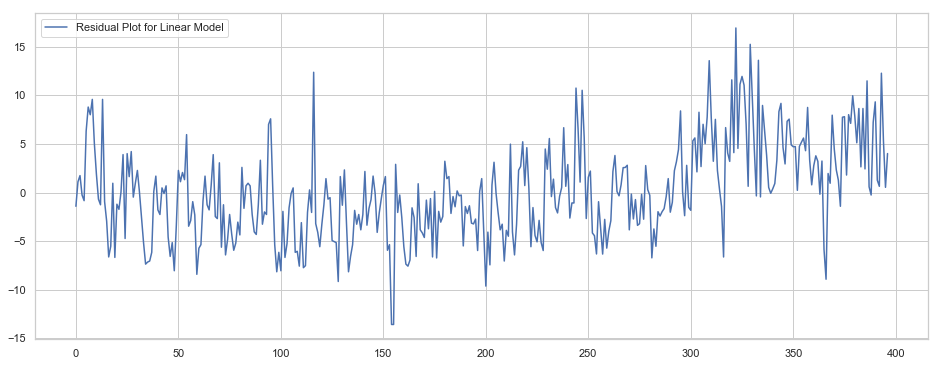

In [30]:
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(111)

ax1.plot(auto.index, auto.resid1, label='Residual Plot for Linear Model')

plt.legend()
plt.show()

### 3.  誤差の分散不均一性

線形回帰モデルのもう一つ重要な仮定は誤差の分散$\mathbb{Var}(\epsilon_i) = \sigma^2$が一定ということである。線形回帰モデルにおける標準誤差、信頼区間、仮説検定などはこの仮定に依存する。

残念なことに、しばしば誤差の分散は均一ではない。例えば誤差の分散は応答変数が増加するに伴い増加するかもしれない。これを分散不均一というが、残差プロットが漏斗の形をしていることにより分散不均一性があるとわかる。

また、参考文献3によると次のように述べてある：
>予測値に対する標準化した残差の絶対値の平方根のプロットは、予測値に対して何らかの傾向がないかを観察し、残差の等分散性を判断することができる。

分散不均一性がある場合の1つの解決策としては、応答変数$Y$を$\log Y$や$\sqrt{Y}$などの凹関数で変換することである。これらの変換は大きい値ほど縮小幅も大きいので分散不均一性をなくすことにつながる。

### 4. 外れ値

外れ値とは$y_i$がモデルによって予測される値からとても離れている点である。外れ値にはデータ収集の際の記録ミスなど多くの原因がある。

外れ値の予測変数が異常値でない場合、OLSによる回帰直線にあまり影響を与えないということはよくある。しかし、外れ値が回帰直線にあまり影響がないとしても、他の問題が起きる。外れ値の除去によってRSEが激減する（例えば0.3くらい減少する）場合は回帰の解釈をする上で問題になるのである。なぜならRSEは信頼区間やp値を計算するのにつかわれるからである。

残差プロット（X軸に予測値、Y軸に残差をプロットしたもの）を使って外れ値の存在を確かめることができる。実用上は、残差がどの程度大きければその観測データが外れ値であると判断するのかは難しい問題であるが、この問題を考えるのに残差プロットではなくスチューデント化残差をプロットする。スチューデント化残差の絶対値が3より大きなものはおそらく外れ値である。スチューデント化残差とは、各残差$e_i$を標準誤差の推定値で割ったもの、すなわち$\frac{e_i}{\sqrt{(\sum _i e_i^2)/(n-(p+1))}}$である。``auto``データでは、2つのデータ点のスチューデント化残差が3より大きな値をとっている。

データを収集、記録する際のエラーにより外れ値が出たという場合は、単にそれらの観測データを取り除けばよい。しかし外れ値はモデルが不十分であるとき、例えば予測変数が足りないなどの理由によっても起きるので注意が必要である。

In [31]:
auto['resid_student'] = auto.resid1 / np.sqrt(np.sum(auto.resid1**2) / (len(auto.index) - 2))

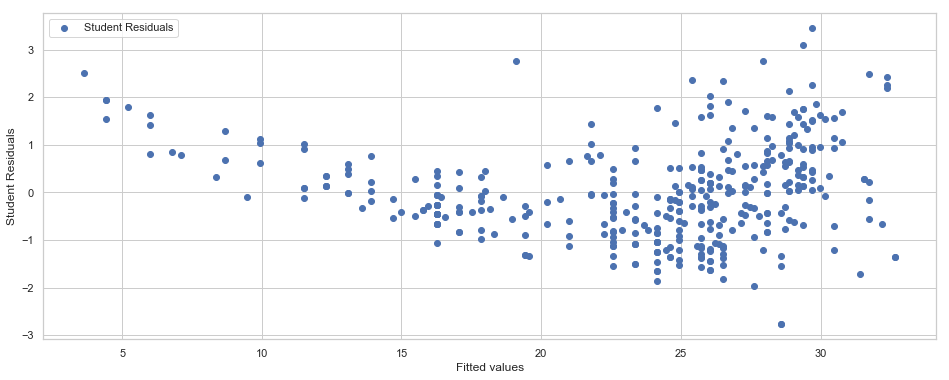

In [32]:
# スチューデント化残差プロットで外れ値を判定する例
fig = plt.figure(figsize=(16,6))

ax1 = fig.add_subplot(111)

ax1.scatter(auto.pred1, auto.resid_student, label='Student Residuals')

ax1.set_xlabel('Fitted values')
ax1.set_ylabel('Student Residuals')

plt.legend()
plt.show()

In [33]:
auto.resid_student.loc[(auto['resid_student'] > 3) | (auto['resid_student'] < -3)]

322    3.449834
329    3.106500
Name: resid_student, dtype: float64

### 5. てこ比が大きい観測データ 

外れ値は観測データの予測変数の値$x_i$に対して応答変数の値$y_i$が通常の値からかけ離れているという点であった。てこ比の大きい値とは、$x_i$が通常の値からかけ離れている点である。

てこ比の大きい点は推定された回帰直線に大きな影響を与えがちであるため、これらの1つか2つのデータに何らかの問題があるために回帰全体の妥当性を失う可能性がある。

単回帰ではてこ比が異常なデータは、予測変数の値が通常の範囲から外れているデータを見つけることによって容易にわかる。2つの予測変数がある重回帰では、$X_1$の値だけあるいは$X_2$の値だけ見ても異常ではないデータにもかかわらずdensityが異常に小さい（てこ比が大きい）点がある。これは$X_1$あるいは$X_2$だけ見ていても見つけることができないため、深刻である。予測変数が3つ以上のときにはプロットする方法がないためさらに深刻である。

見つけ方としては、てこ比の値が$(p+1)/n$よりかなり大きい点はてこ比が大きいと疑ってみるとよい。てこ比は常に$1$と$1/n$の間の数であるが、すべてのデータのてこ比の標本平均は必ず$(p+1)/n$であるからである。

### 6. 共線性

共線性とは、2つまたはそれ以上の予測変数に強い相関があることを指す。共線性があるデータの例は、図3.14の右のグラフである：

### 図3.14

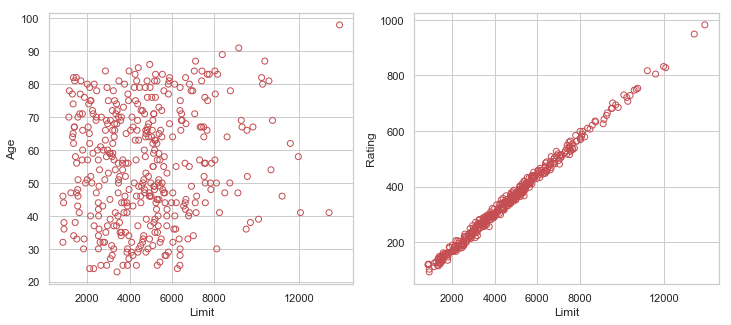

In [34]:
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(12,5))

# Left plot
ax1.scatter(credit.Limit, credit.Age, facecolor='None', edgecolor='r')
ax1.set_ylabel('Age')

# Right plot
ax2.scatter(credit.Limit, credit.Rating, facecolor='None', edgecolor='r')
ax2.set_ylabel('Rating')

for ax in fig.axes:
    ax.set_xlabel('Limit')
    ax.set_xticks([2000,4000,6000,8000,12000])

共線性があることは回帰分析では大きな問題となる。共線性があると、応答変数に与える影響をひとつひとつの予測変数に分けて考えることが難しいからである。つまり、``Rating``と``Age``は一緒に増減するので、各変数が応答変数``Balance``にどう影響しているのか分けて考えることが難しいのである。

共線性は回帰係数の推定値の精度を落とすため、$\hat{\beta}_j$の標準誤差を増加させる。それぞれの予測変数の$t$統計量は$\hat{\beta}_j$をその標準誤差で割ったものであるため、共線性は$t$統計量を減少させる。結果として共線性がある場合、帰無仮説$H_0: \beta_j = 0$を棄却しないことになるかもしれない。これは共線性によって仮説検定の検出力、つまり係数が0でないことを間違いなく見つける確率が減少したということを意味する。

次の表はプロットの2つの予測変数をそれぞれ使った時の重回帰モデルの結果である（最初のモデルは``Balance``を``Age``と``Limit``に、2つ目のモデルは``Balance``を``Rating``と``Limit``に重回帰したもの）。最初のモデルでは``Age``、``Limit``ともにp値が非常に小さく、かなり統計的に有意である。2番目のモデルは``Limit``と``Rating``の共線性により、``Limit``の係数の推定値の標準誤差が12倍も増加し、p値は0.701に増加した。``Limit``変数の重要さが共線性によって隠れてしまったともいえる。これを防ぐには回帰を当てはめる前に共線性の問題があるかどうかを確かめ、対処することが望ましい。

### 表3.11

In [35]:
est = smf.ols('Balance ~ Age + Limit', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-173.4109,43.828,-3.957,0.000,-259.576,-87.246
Age,-2.2915,0.672,-3.407,0.001,-3.614,-0.969
Limit,0.1734,0.005,34.496,0.000,0.163,0.183


In [36]:
est = smf.ols('Balance ~ Rating + Limit', credit).fit()
est.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,-377.5368,45.254,-8.343,0.000,-466.505,-288.569
Rating,2.2017,0.952,2.312,0.021,0.330,4.074
Limit,0.0245,0.064,0.384,0.701,-0.101,0.150


共線性を確かめる簡単な方法は、予測変数の相関行列をまず見ることである。相関行列の要素のうち、絶対値が大きいものは相関が高い2つの変数を表している。したがってそのデータには共線性の問題がある。

相関行列だけでは全ての共線性を見つけることはできず、2変数間の相関が高くなくても3またはそれ以上の変数が共線性を持つことがある。これを多重共線性と呼ぶ。多重共線性を見つける良い方法は、相関行列を見るのではなく、分散拡大因子（VIF: variance inflation factor）を計算することである。VIFはすべての変数を含めたときの$\hat{\beta}_j$の分散を、その変数だけの場合の$\hat{\beta}_j$の分散で割ったものである。VIFの最小値は1であり、これは多重共線性が無いことを示すが、慣習的にVIFが5あるいは10を上回っているとき共線性が問題ということを示す。各VIFは次で計算できる：

\begin{equation}
    \mathrm{VIF}(\hat{\beta}_j) = \frac{1}{1 - R^2_{X_j | X_{-j}}}
\end{equation}

ここに、$R^2_{X_j | X_{-j}}$は$X_j$を他のすべての予測変数に回帰したときの$R^2$である。もし$R^2_{X_j|X_{-j}}$が1に近いと、これは共線性の存在を意味し、したがってVIFは大きくなる。

先の``Credit``データで``Balance``を``Age``、``Rating``、``Limit``に回帰した結果、予測変数のVIFはそれぞれ1.01, 160.67, 160.59であり、データにはかなりの共線性があることがわかる：

In [37]:
est_Age = smf.ols('Age ~ Rating + Limit', credit).fit()
est_Rating = smf.ols('Rating ~ Age + Limit', credit).fit()
est_Limit = smf.ols('Limit ~ Age + Rating', credit).fit()

print(1/(1-est_Age.rsquared))
print(1/(1-est_Rating.rsquared))
print(1/(1-est_Limit.rsquared))

1.0113846860681328
160.66830095856935
160.59287978597942


共線性があるとき、対処法は2つある。1つは回帰から問題のある変数のうち1つを取り除くことである。通常これを実行しても回帰直線の当てはまりに悪影響はない。なぜなら、共線性があるということはそもそも他の変数がモデルに含まれている限り、その変数は必要ないということだからである。

2つ目の対処法は、共線性のある変数をまとめて1つの予測変数にすることである。例えば``Limit``と``Rating``の変数を標準化し、それらの平均をとることで、その人の信用度を測る新たな変数を作るとよいかもしれない。

冒頭の問いへの答えとしては以下のようになる。

### 1. 広告にかける費用とセールスの間には関係があるのか

この問いには、``sales``を``TV``、``radio``、``newspaper``に重回帰し、全ての係数$=$０の帰無仮説を検定することで答えることができる。F統計量を使って帰無仮説を棄却すべきかどうかを判断する。この場合は表3.6のF統計量に対応するp値はとても小さい。これは関係があることの明確な根拠である。

### 2. 広告費用とセールスの関係はどの程度の強さか

モデルの精度を測る方法は2つあった。1つはRSEであり、もう1つは$R^2$である。これらの結果は表3.6にある。$R^2$は応答変数の分散のうち、何%が予測変数によって説明されているかを表すものであった。予測変数は``sales``の分散のほぼ9割を説明している。

### 3. どの広告メディアがセールスに貢献するのか

この問いに答えるには、各予測変数の$t$統計量を検証すればよい。表3.4によれば、重回帰では``TV``と``radio``のp値は小さい。しかし``newspaper``のp値はそうでない。これは``TV``と``radio``のみが``sales``に関係しているということを示唆している。

### 4. それぞれのメディアがセールスに貢献する度合いをどの程度正確に予測することができるのか

``Advertising``データで推定した各係数の信頼区間を求めると、``TV``においては$(0.043, 0.049)$、``radio``においては$(0.172, 0.206)$、``newspaper``においては$(-0.013, 0.011)$であった。``TV``と``radio``の信頼区間は狭く、0からは程遠い。これはこの2つのメディアが``sales``と関係していることの証拠である。しかし、``newspaper``の信頼区間は0を含んでおり、この変数は``TV``や``radio``の値からすると統計的に有意でないといえる。共線性が大きな標準誤差をもたらすということを先に述べたが、``newspaper``の信頼区間が広いのは共線性によるものではない。その証拠に、各VIF値はそれぞれ$1.005$、$1.145$、$1.145$であり、共線性は見られないようである。各広告メディアが単独でセールスにどれくらいの影響があるかを調べるには、3つ別々の線形回帰を行えばよい。

### 5. 将来のセールスをどの程度正確に予測できるのか

モデル式を使って予測するのだが、応答変数$Y = f(X) + \epsilon$を予測したいのかその平均を予測したいのかによる。前者であれば予測区間、後者であれば信頼区間を使う。

### 6. 線形の関係であるか

残差プロットで確認したように、非線形がある。関係が非線形であれば、残差プロットにパターンは見られないはずである。``Advertising``データでは3Dプロットで非線形性を確認したが、残差プロットでも確認できるはずである。

### 7. 各メディア間でのシナジー効果（交互作用）は存在するか

標準の線形回帰モデルは予測変数と応答変数の関係は加法的であると仮定している。加法モデルはそれぞれの予測変数の応答変数に対する影響が他の変数の値と関係ないので、モデルを解釈しやすい。交互作用項のp値の小ささが加法的ではない関係があることを示しているが、3Dプロットの図からもデータは加法モデルではない可能性があるとわかる。交互作用項をモデルに加えることで、$R^2$は90%くらいから97%くらいまで向上する。


# Reference 

1. 落海浩，首藤信通．Rによる統計的学習入門．朝倉書店，2018，403p．
2. https://github.com/JWarmenhoven/ISLR-python
3. 日本統計学会．統計検定 1級・準1級公式問題集．実務教育出版．2018，224p．